In [1]:
import axelrod as axl
alex, camille = axl.Alternator(), axl.TitForTat()
match = axl.Match([alex, camille], 10)
_ = match.play()
print(match.sparklines(c_symbol='😀', d_symbol='🎁'))

😀🎁😀🎁😀🎁😀🎁😀🎁
😀😀🎁😀🎁😀🎁😀🎁😀


In [2]:
family = [axl.Cooperator(),
...           axl.Defector(),
...           axl.Alternator(),
...           axl.TitForTat(),
...           axl.TwoTitsForTat(),
...           axl.Grudger()]
christmas = axl.Tournament(family, turns=50, repetitions=1)
results = christmas.play()
results.scores
    

[[525], [562], [417], [622], [646], [646]]

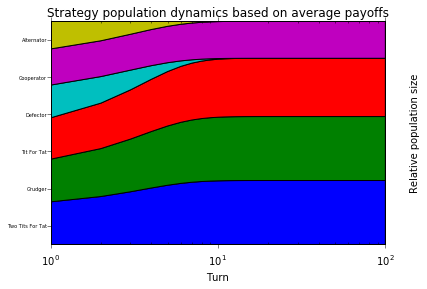

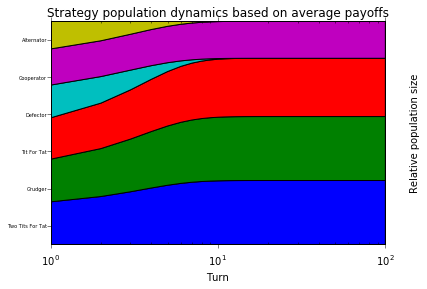

In [9]:
%matplotlib inline
evo = axl.Ecosystem(results)
evo.reproduce(100)
plot = axl.Plot(results)
plot.stackplot(evo)

In [5]:
def check_if_end_pop_cooperates(r=3, p=1, s=0, t=5,
...                                 digits=5, family=family, turns=10000):
...    """Returns a boolean and the last population vector"""
...    game = axl.Game(r=r, p=p, s=s, t=t)
...    christmas = axl.Tournament(family, turns=50, repetitions=1, game=game)
...    results = christmas.play()
...    evo = axl.Ecosystem(results)
...    evo.reproduce(turns)
...    last_pop = [round(pop, digits) for pop in evo.population_sizes[-1]]
...    return last_pop[1] == last_pop[2] == 0, last_pop

In [6]:
check_if_end_pop_cooperates(r=3, p=1, s=0, t=5)

(True, [0.16576, 0.0, 0.0, 0.26105, 0.28659, 0.28659])

In [7]:
check_if_end_pop_cooperates(r=3, p=1, s=0, t=500)

(False, [0.0, 1.0, 0.0, 0.0, 0.0, 0.0])